# 直线回归

In [2]:
import numpy as np

## 最小二乘法

In [3]:
def ordinaryLeastSquares(X,Y):
    # 最小二乘法的原理是尽可能使得观察值y'与真实值y的偏差量小，使用偏差的平方和作为标准，平方和求导为0时平方和最小，求出此时拟合直线斜率和截距即可
    k=(len(X)*sum(X*Y)-sum(X)*sum(Y))/(len(X)*sum(X*X)-sum(X)**2)
    b=Y.mean()-k*X.mean()
    return k,b

身高：143,145,146,147,149,150,153,154,155,156,157,158,159,160,162,164
腿长：88,85,88,91,92,93,93,95,96,98,97,96,98,99,100,102

In [4]:
X=np.array([143,145,146,147,149,150,153,154,155,156,157,158,159,160,162,164])
Y=np.array([88,85,88,91,92,93,93,95,96,98,97,96,98,99,100,102])


In [5]:
k,b=ordinaryLeastSquares(X,Y)
k,b

(0.7193521935219352, -16.0729807298073)

In [6]:
neo_X=np.array([165])
neo_Y=k*neo_X+b
neo_Y

array([102.6201312])

## 多元线性回归

1. 对参数进行点估计，求出回归方程
2. 对参数，模型进行检验
3. 对y做点估计

In [7]:
# 多元线性回归模型的参数估计
def regression(X,Y):
    return np.dot(np.linalg.inv((np.dot(np.transpose(X),X))),(np.dot(np.transpose(X),Y)))


In [8]:
x=np.array([[1,3,4,6],[3,2,5,3],[9,7,5,6]])
y=np.array([[1],[3],[6]])
beta=regression(x,y)
test_x=np.array([1,2,3,4])
test_y=np.dot(test_x,beta)
test_y,beta

(array([1.75]),
 array([[-1.5 ],
        [ 4.  ],
        [-0.25],
        [-1.  ]]))

# 非线性回归

配曲线
- 画出散点图
- 估计曲线类型
- 估计位置参数  
估计位置参数方法：转换为线性函数，用线性回归方法求得参数

## 多项式回归


In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# 读取数据集
datas=pd.read_csv('data.csv') 
datas

,sno,Temperature,Pressure
0,1,0,0.0002
1,2,20,0.0012
2,3,40,0.0060
3,4,60,0.0300
4,5,80,0.0900
5,6,100,0.2700


In [10]:
X=datas.iloc[:,1:2].values # 该方法返回的是第一列，并且为列向量
Y=datas.iloc[:,2].values # 该方法返回第二列，但是结果为标量（一维数组）
X,Y

(array([[  0],
        [ 20],
        [ 40],
        [ 60],
        [ 80],
        [100]], dtype=int64),
 array([2.0e-04, 1.2e-03, 6.0e-03, 3.0e-02, 9.0e-02, 2.7e-01]))

### 使用线性回归和多项式回归拟合数据

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# LinearRegression
lin=LinearRegression()
lin.fit(X,Y)

# PolynomialRegression
poly=PolynomialFeatures(degree= 4) #最高次数为4
X_poly=poly.fit_transform(X)
poly.fit(X_poly,Y)
lin2=LinearRegression()
lin2.fit(X_poly,Y)
X_poly

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 2.000e+01, 4.000e+02, 8.000e+03, 1.600e+05],
       [1.000e+00, 4.000e+01, 1.600e+03, 6.400e+04, 2.560e+06],
       [1.000e+00, 6.000e+01, 3.600e+03, 2.160e+05, 1.296e+07],
       [1.000e+00, 8.000e+01, 6.400e+03, 5.120e+05, 4.096e+07],
       [1.000e+00, 1.000e+02, 1.000e+04, 1.000e+06, 1.000e+08]])

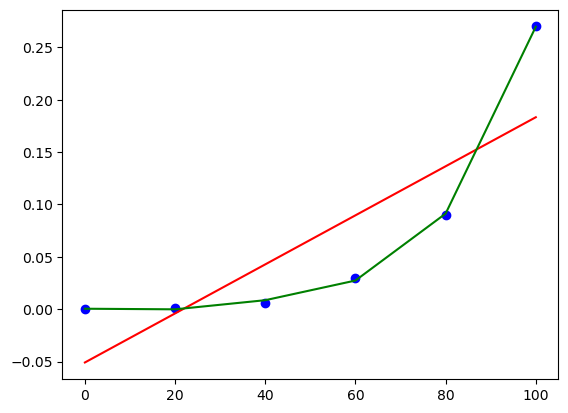

In [12]:
plt.scatter(X,Y,color='blue')
plt.plot(X,lin.predict(X),color='red')
plt.plot(X,lin2.predict(poly.fit_transform(X)),color='green')

plt.show()

可以注意到，多项式回归比线性回归更符合散点的分布

In [13]:
pred_1=lin.predict([[110]])
pred_2=lin2.predict(poly.fit_transform([[110]]))
pred_1,pred_2

(array([0.20675333]), array([0.43295877]))